## Chapter 6

Problem 6.1

### Exercise 6.1:  A circuit of resistors

Consider the following circuit of
resistors:

<img src="resistor.png" alt="drawing" width="200"/>

All the resistors have the same resistance $R$.  The power rail at the top
is at voltage $V_+=5\,$V.  What are the other four voltages, $V_1$
to $V_4$?

To answer this question we use Ohm's law and the Kirchhoff current
law, which says that the total net current flow out of (or into) any
junction in a circuit must be zero.  Thus for the junction at
voltage~$V_1$, for instance, we have
\begin{equation}
{V_1-V_2\over R} + {V_1-V_3\over R} + {V_1-V_4\over R} + {V_1-V_+\over R}
= 0,
\end{equation}
or equivalently
\begin{equation}
4V_1 - V_2 - V_3 - V_4 = V_+.
\end{equation}

A) Write similar equations for the other three junctions with unknown
voltages.

For the junction at voltage $V_2$:
\begin{equation}
{V_2-V_1\over R} + {V_2-V_3\over R} + {V_2-0\over R}
= 0,
\end{equation}
or equivalently
\begin{equation}
-V_1 + 3V_2 - V_4 = 0.
\end{equation}

For the junction at voltage $V_3$:
\begin{equation}
{V_3-V_1\over R} + {V_3-V_4\over R} + {V_3-V_+\over R} 
= 0,
\end{equation}
or equivalently
\begin{equation}
-V_1 + 3V_3 - V_4 = V_+.
\end{equation}

For the junction at voltage $V_4$:
\begin{equation}
{V_4-V_1\over R} + {V_4-V_2\over R} + {V_4-V_3\over R} + {V_4-0\over R}
= 0,
\end{equation}
or equivalently
\begin{equation}
-V_1 - V_2 - V_3 + 4V_4 = 0.
\end{equation}




B) Write a program to solve the four resulting equations using Gaussian
  elimination and hence find the four voltages (or you can modify a program
  you already have, such as the program *gausselim.py* in
  Example~6.1).



In [2]:
# Modified gausslim.py
from numpy import array,empty

A = array([[ 4, -1, -1, -1 ],
           [-1,  3,  0, -1 ],
           [-1,  0,  3, -1 ],
           [-1, -1, -1,  4 ]], float)
v = array([ 5, 0, 5, 0 ],float)
N = len(v)

# Gaussian elimination
for m in range(N):

    # Divide by the diagonal element
    div = A[m,m]
    A[m,:] /= div
    v[m] /= div

    # Now subtract from the lower rows
    for i in range(m+1,N):
        mult = A[i,m]
        A[i,:] -= mult*A[m,:]
        v[i] -= mult*v[m]

# Backsubstitution
x = empty(N,float)
for m in range(N-1,-1,-1):
    x[m] = v[m]
    for i in range(m+1,N):
        x[m] -= A[m,i]*x[i]

print("Solutions:\n")
for i in range(0,4):
    print(f"V_{i+1:1}: {x[i]:.3f}")

Solutions:

V_1: 3.000
V_2: 1.667
V_3: 3.333
V_4: 2.000


In [3]:
# Exercise 6.4 - same thing but use 'solve'

import numpy as np
from numpy.linalg import solve

A = np.matrix([[4,-1,-1,-1],[-1,3,0,-1],[-1,0,3,-1],[-1,-1,-1,4]])
v = np.array([5,0,5,0])

x = solve(A,v)
print("Solutions:\n")
for i in range(0,4):
    print(f"V_{i+1:1}: {x[i]:.3f}")

Solutions:

V_1: 3.000
V_2: 1.667
V_3: 3.333
V_4: 2.000


## Springs Example 6.2



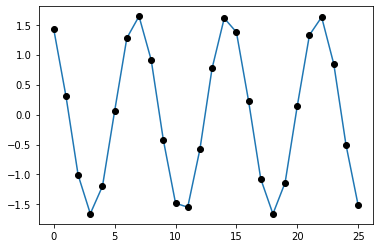

In [4]:
%matplotlib inline
from numpy import zeros,empty
from pylab import plot,show

# Constants
N = 26
C = 1.0
m = 1.0
k = 6.0
omega = 2.0
alpha = 2*k-m*omega*omega

# Set up the initial values of the arrays
A = zeros([N,N],float)
for i in range(N-1):
    A[i,i] = alpha
    A[i,i+1] = -k
    A[i+1,i] = -k
A[0,0] = alpha - k
A[N-1,N-1] = alpha - k

v = zeros(N,float)
v[0] = C

# Perform the Gaussian elimination
for i in range(N-1):

    # Divide row i by its diagonal element
    A[i,i+1] /= A[i,i]
    v[i] /= A[i,i]

    # Now subtract it from the next row down
    A[i+1,i+1] -= A[i+1,i]*A[i,i+1]
    v[i+1] -= A[i+1,i]*v[i]

# Divide the last element of v by the last diagonal element
v[N-1] /= A[N-1,N-1]

# Backsubstitution
x = empty(N,float)
x[N-1] = v[N-1]
for i in range(N-2,-1,-1):
    x[i] = v[i] - A[i,i+1]*x[i+1]

# Make a plot using both dots and lines
plot(x)
plot(x,"ko")
show()

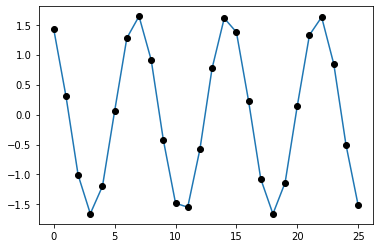

In [5]:
# Simpler example

from numpy import empty,zeros
from banded import banded
from pylab import plot,show

# Constants
N = 26
C = 1.0
m = 1.0
k = 6.0
omega = 2.0
alpha = 2*k-m*omega*omega

# Set up the initial values of the arrays
A = empty([3,N],float)
for i in range(N):
    A[0,i] = -k
    A[1,i] = alpha
    A[2,i] = -k
A[1,0] = alpha - k
A[1,N-1] = alpha - k

v = zeros(N,float)
v[0] = C

# Solve the equations
x = banded(A,v,1,1)

# Make a plot using both dots and lines
plot(x)
plot(x,"ko")
show()

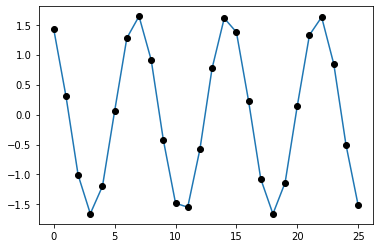

In [6]:
# This time use scipy linalg solve banded

from numpy import empty,zeros
from scipy.linalg import solve_banded
from pylab import plot,show

# Constants
N = 26
C = 1.0
m = 1.0
k = 6.0
omega = 2.0
alpha = 2*k-m*omega*omega

# Set up the initial values of the arrays
A = empty([3,N],float)
for i in range(N):
    A[0,i] = -k
    A[1,i] = alpha
    A[2,i] = -k
A[1,0] = alpha - k
A[1,N-1] = alpha - k
B = zeros(N)
B[0] = C

x = solve_banded((1,1),A,B)  # one row above diag, one row below

# Make a plot using both dots and lines
plot(x)
plot(x,"ko")
show()

---
### Exercise 6.6

Starting with either the program springs.py on page 237 or
springsb.py on page~238, remove the code that makes a graph of the
results and replace it with code that creates an animation of the masses as
they vibrate back and forth, their displacements relative to their resting
positions being given by the real part of Eq. (6.53).  For clarity, assume
that the resting positions are two units apart in a horizontal line.  At a
minimum your animation should show each of the individual masses, perhaps
as small spheres.  (Spheres of radius about 0.2 or 0.3 seem to work well.)

In [ ]:
# This time use scipy linalg solve banded

from numpy import empty,zeros
from scipy.linalg import solve_banded
from pylab import plot,show
from vpython import *

# Constants
N = 26
C = 1.0
m = 1.0
k = 6.0
omega = 2.0
alpha = 2*k-m*omega*omega
R = 0.3

framerate = 30

# Set up the initial values of the arrays
A = empty([3,N],float)
for i in range(N):
    A[0,i] = -k
    A[1,i] = alpha
    A[2,i] = -k
A[1,0] = alpha - k
A[1,N-1] = alpha - k
B = zeros(N)
B[0] = C

x = solve_banded((1,1),A,B)  # one row above diag, one row below

# make the visualization
s = empty(N,sphere)
mu = empty(N)
for i in range(N):
    mu[i] = 2*i-N
    s[i] = sphere(pos=vector(mu[i,],0,0),radius=R)
t = 0.0
while True:
    rate(framerate)
    t += 1/framerate
    for i in range(N):
        s[i].pos = vector(mu[i]+x[i]*cos(omega*t),0,0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>